In [ ]:
# imports
from classes.loaddata import OurDataset
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
from collections import defaultdict
import random
import os
import csv

# set seed
random.seed(4241221)

In [ ]:
"""
TO CREATE NEW DATASET ONLY RUN FIRST THREE CELLS

Note: Might take a few minutes

Note: the rest is for data analysis
"""

In [ ]:
"""
Add images per birdsclass to a list
"""
dataset = OurDataset(csv_file = "datafile/train_images.csv", root_dir = "datafile/train_images", transform = None)
all_birds_images = defaultdict(list)
for picture in range(3926):
    img, label = dataset[picture]
    all_birds_images[int(label)].append(img)
all_birds_images = [all_birds_images[i] for i in range(1, 201)]

In [ ]:
"""
Transformations to be applied to new dataset
"""
dataset_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.6),
    transforms.RandomApply([transforms.RandomRotation(degrees=90)], p=0.05),
    transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)], p=0.2),
    transforms.RandomVerticalFlip(p=0.1),
    transforms.RandomApply([transforms.Grayscale(num_output_channels=3)], p=0.05),
    transforms.ToTensor()
])

In [ ]:
"""
Create new dataset dataset
"""
to_pil = transforms.ToPILImage()
# output folders
output_folder = "manipulated_images"
csv_file_path = os.path.join("image_metadata.csv")
os.makedirs(output_folder, exist_ok=True) 

with open(csv_file_path, mode="w", newline="") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Image", "Label"])
    """
    For each bird type. 1. Check how much images one bird has 2. Check the difference with 35 
    3. Create the difference amount of new images based on images we have with image transforms
    4. Add new pictures to existing ones
    """
    for i in range(0,200):
        print(i)
        bird_type_images = all_birds_images[i]
        bird_type_images_new = []
        amount = len(bird_type_images)
        for j in range(35 - amount):
            random_image = random.choice(bird_type_images)
            transformed_image = dataset_transforms(random_image)
            bird_type_images_new.append(transformed_image)

        bird_type_images = bird_type_images + bird_type_images_new

        for picture in range(35):
            image_name = f"{i}_{picture}.jpg"
            output_path = os.path.join(output_folder, image_name)
            # to PIL and save to folder
            transformed_pil_image = to_pil(bird_type_images[picture])
            transformed_pil_image.save(output_path)
            # metadata to CSV
            csv_writer.writerow([image_name, i + 1])

# data analysis from here

In [ ]:
"""
Set up dataset and create lists for plots
"""
dataset = OurDataset(csv_file = "datafile/train_images.csv", root_dir = "datafile/train_images", transform = None)
data, label = dataset[1]
data.shape
len(dataset)

label_list = []
for i in range(len(dataset)):
    _, label = dataset[i]
    label_list.append(int(label))

np.array(label_list)

unique_labels1, count1 = np.unique(label_list, return_counts=True)

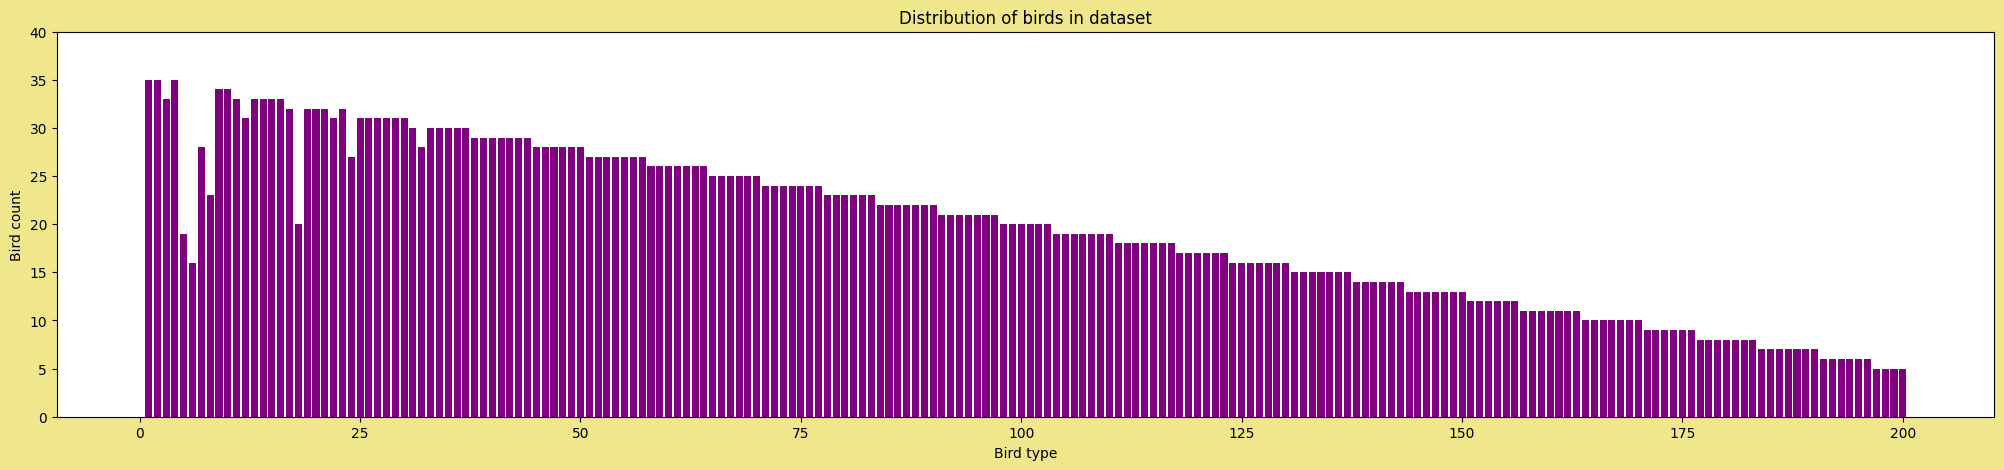

In [102]:
# Plot the counts
plt.figure(figsize=(25,5), facecolor="khaki")
plt.bar(unique_labels1, count1, color="purple")
plt.xlabel("Bird type")
plt.ylabel("Bird count")
plt.ylim(0,40)
plt.title("Distribution of birds in dataset")
plt.show()


In [181]:
new_dataset = OurDataset(csv_file = "image_metadata.csv", root_dir = "manipulated_images/", transform = None)


In [184]:
data, label = new_dataset[1]
data.shape
len(new_dataset)

label_list = []
for i in range(len(new_dataset)):
    _, label = new_dataset[i]
    label_list.append(int(label))

np.array(label_list)

unique_labels, count = np.unique(label_list, return_counts=True)

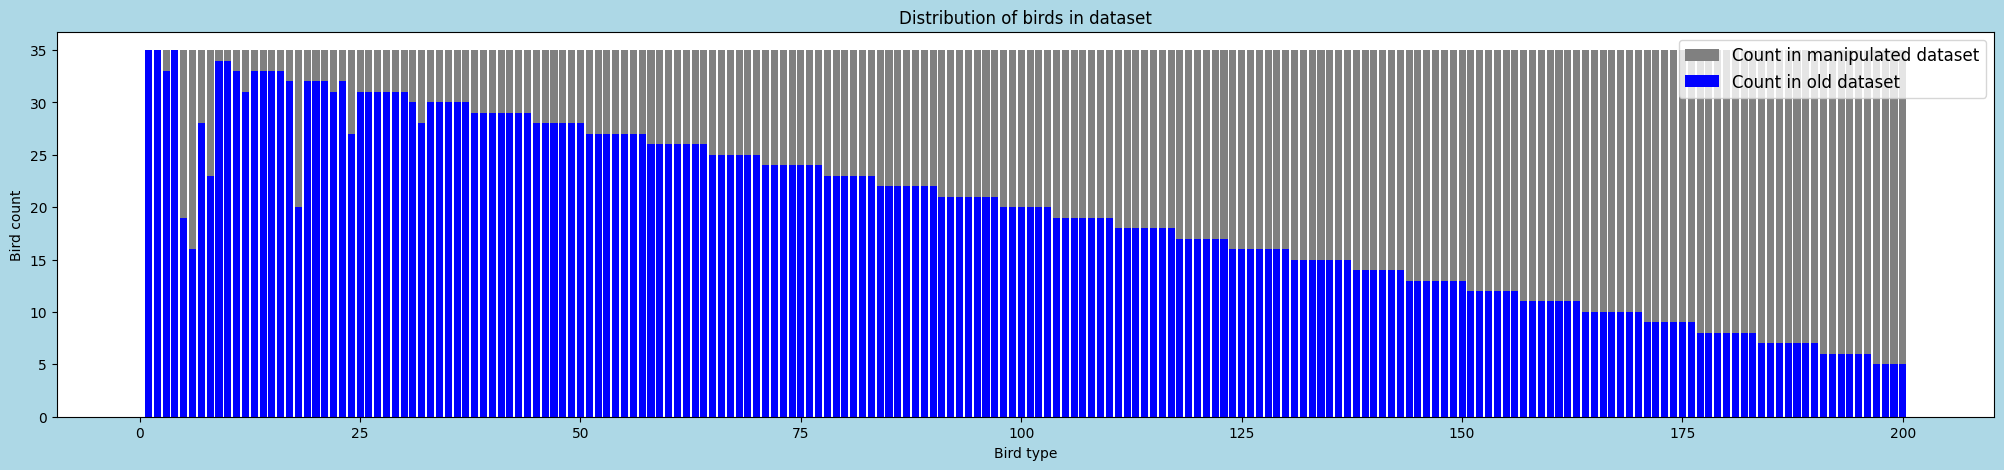

In [186]:
# Plot the counts
plt.figure(figsize=(25,5), facecolor="lightblue")
plt.bar(unique_labels, count, color="gray", label = "Count in manipulated dataset")
plt.bar(unique_labels1, count1, color="blue", label = "Count in old dataset")
plt.xlabel("Bird type")
plt.ylabel("Bird count")
plt.title("Distribution of birds in dataset")
plt.legend(fontsize="large")
plt.show()

In [ ]:
"""
TRY OUTS
"""
dataset_transforms2 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomPerspective(distortion_scale=0.3, p=0.2),
    # transforms.RandomPerspective(distortion_scale=0.2, p=0.25),
    # transforms.RandomApply([transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=5)], p=0.25),
    transforms.ToTensor()
])
img, label = dataset[3]
transformed_image = dataset_transforms2(img)
save_image(transformed_image, "test.jpg")

tensor(2)